<a href="https://colab.research.google.com/github/Aahra/End-to-End-Heart-Disease-classification-Milestone-Project-1-/blob/main/End_to_end_Heart_disease_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Predicting  heart disease using Machine learning

## This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has a heart disease based on their medical attributes


## We are going to take the following approach-
##1. Problem definition
#### Given clinical parameters about a patient ,can we predict whether  or not they have a heart disease or not.
##2. Data
#### <b>Resources -(UCI Machine learning repo),(Kaggle)
#### The original dataset came from the Cleveland data from the UCI machine learning repo and also has a copy on Kaggle - https://www.kaggle.com/ronitf/heart-disease-uci
##3. Evaluation-What is success for us?
#### If we can reach 95% accuracy at predicting wheher or not a patient has a heart disease during the proof of concept,we'll pursue the project.
##4. Features(of Data)
#### Create a data dictionary
###### 1. age -in years

2.sex- (1 = male; 0 = female)

3 cp- chest pain type

4.trestbps- resting blood pressure (in mm Hg on admission to the hospital)

5.chol- serum cholestoral in mg/dl

6.fbs- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg- resting electrocardiographic results

8.thalach- maximum heart rate achieved

9.exang- exercise induced angina (1 = yes; 0 = no)

10.oldpeak- ST depression induced by exercise relative to rest

11.slope- the slope of the peak exercise ST segment

12.ca- number of major vessels (0-3) colored by flourosopy

13.thal- 3 = normal; 6 = fixed defect; 7 = reversable defect

14.target- 1 or 0
##5. Modelling

##6. Experimentation

## Preparing the Tool

We're going to use Pandas,matplotlib,NumPy,scikit learn for Data Analyis and  Manipulation

In [3]:

##IMPORT ALL THE TOOLS

#Regular EDA (exploratory  data analysis)and plotting libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
##we  want the plot  figure to appear inside the notebook

#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



**Load data**

In [4]:
df1= "https://raw.githubusercontent.com/Aahra/End-to-End-Heart-Disease-classification-Milestone-Project-1-/main/Datasets/heart-disease.csv"
df = pd.read_csv(df1)
df
#df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##Data exploration (exploratory data analysis or EDA)

####The goal is to find about more thedata and  become a subject matter expert on the dataset  you're working upon.

1.What question are you trying to solve?

2.What kind of data do you  have and how do we treat different data type ?

3.What's missing from the data and howdo you deal with it??

4.Where are the outliers and why should you care about it?

5.How can you add  ,remove more features to get more from your data.

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#Let find out  how many of each class is there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

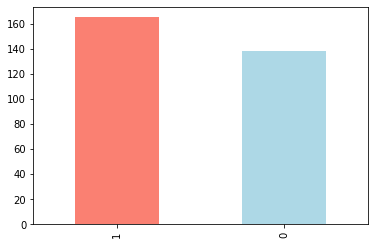

In [8]:
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
## Compare  target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


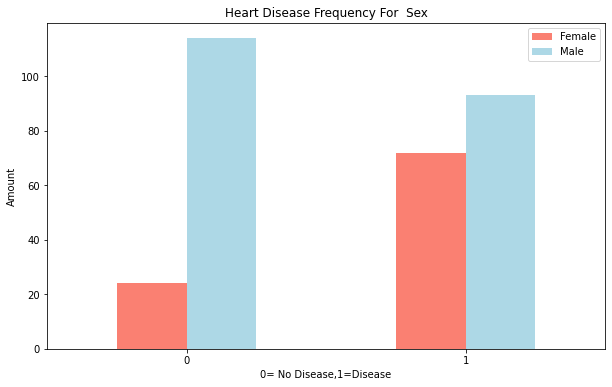

In [13]:
#Create a plot  of Crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize =(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency For  Sex")
plt.xlabel("0= No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs Max Heart rate for Heart  Disease

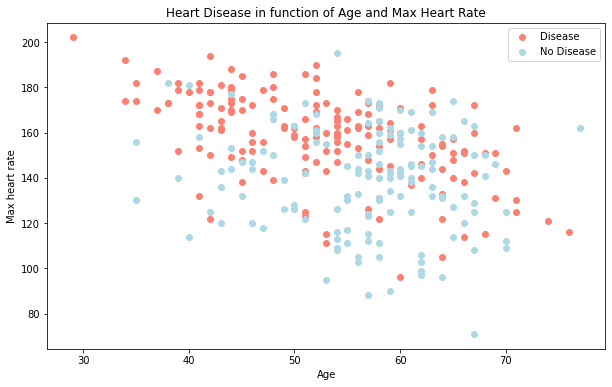

In [14]:
##Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive example
#Scatter comes into picture when the  range of values is wide (91 different values  for thalach)
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
#Scatter with a negative  example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")


#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

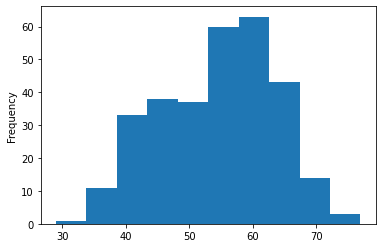

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

###Heart disease Frequency per Chest pain type


In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


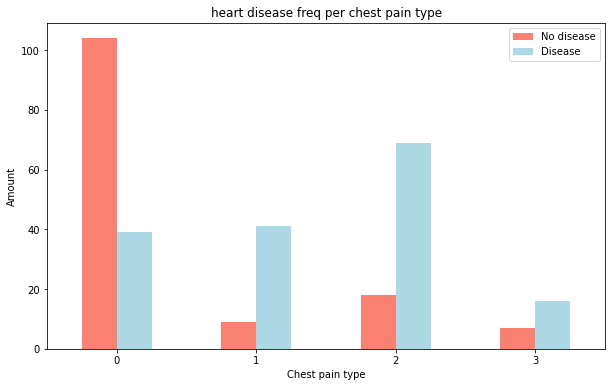

In [17]:
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                  figsize =(10,6),
                                  color = ["salmon","lightblue"])
plt.title("heart disease freq per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [18]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


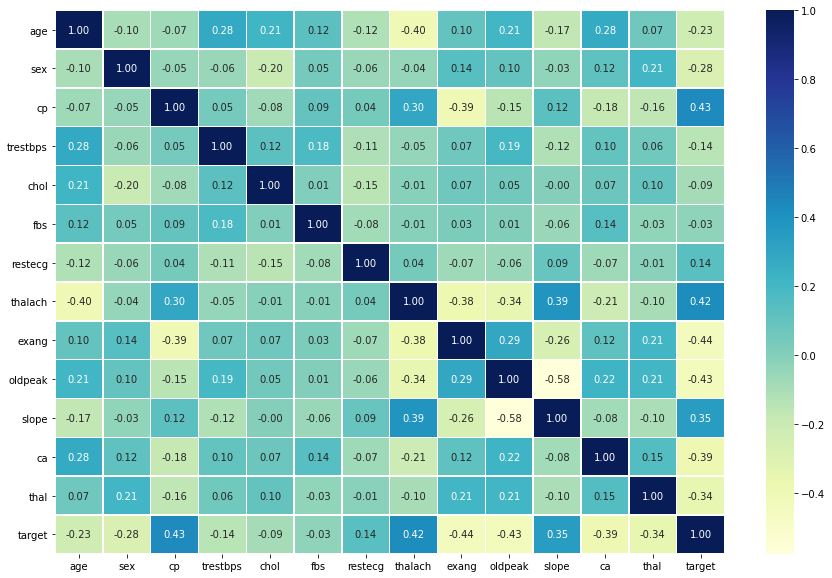

In [19]:
# A little more understandable correlation  matrix
corr_matrix = df.corr()
fix,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot= True ,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap ="YlGnBu");

# <b>Modelling



In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split data into x and y
X= df.drop("target",axis = 1)
Y= df["target"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split the data into test and train dataset
np.random.seed(42)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

###Data is split into training and test  split dataset
###We  will train it to find the patterns on the training set and will test it using the patterns it found on the test  set.
## Choosing  a model refer it  --- > https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### Trying 3 different  machine learning models

1. Logistic regression
2. K- Nearest Neighbours classifier
3. Random Forest Classifier

In [23]:
## Creating a dictionary and  put in the models 

models = {"Logistic Regression ": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

## Create a func to fit and score models 

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of different scikit learn machine learning models
  X_train- Training data
  X_test- Testing data
  Y_train- Training labels 
  Y_test- Testing Labels 
  """

  # Set random seed
  np.random.seed(42)
  # Make a dict to keep model scores
  model_scores = {}
  # Loop through models 
  for name,model in models.items():
     #Fit the model to the data
     model.fit(X_train,Y_train)
     #evalaute the model and append its score to model_score
     model_scores[name] = model.score(X_test,Y_test)
  return model_scores


In [24]:
model_scores = fit_and_score(models = models ,
                             X_train = X_train,
                             Y_train = Y_train ,
                             X_test = X_test,
                             Y_test = Y_test
                           )
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression ': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

Model Comparison

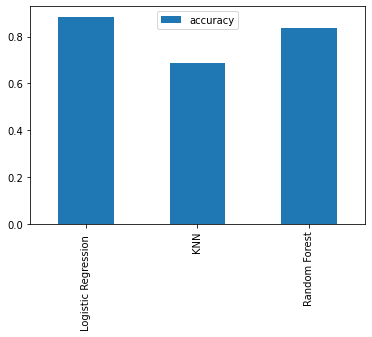

In [25]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar()
#Using the  Transpose to plot the bar

Baseline  model is completed for the Experimental phase to try to improve the model .
Few pointers
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross_validation
* Precision
* Recall
* F1 score
* Classification report
* Roc curve
* Area under the curve

## <b>Hyperparameter Tuning --> BY hand



In [26]:
#Tune KNN 

train_scores = []
test_scores = []

# Create a list of different  values for KNN 
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different  KNN neighbours
for i in neighbors:
  knn.set_params(n_neighbors= i)
  #Fit the algo
  knn.fit(X_train,Y_train)
  #Update the training scores list
  train_scores.append(knn.score(X_train,Y_train))
  #Update the test score list
  test_scores.append(knn.score(X_test,Y_test))


In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum kNN SCORE of the test data : 75.409836%


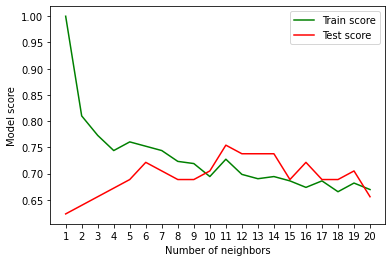

In [29]:
plt.plot(neighbors,train_scores,label = "Train score",c= "Green")
plt.plot(neighbors, test_scores , label =  "Test score",c = "Red")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum kNN SCORE of the test data : {max(test_scores)*100:2f}%")
#Experimented thrugh KNN but the  results arer not  the best

## <b>Hyperparameter  Tuning  using RandomizedSearchCV

We are going to tune : 
Logistic Regression and RandomForest Classifier using Randomized SearchCV


In [30]:
# Create a hyperparameter  grid for Logistic Regression
log_reg_grid = {"C" :np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparamter grid for RandomForestClassifier

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we have  hyperparameter  grds setp for each of our  models ,lets tune them 

In [31]:
#Tune  logistic regression
np.random.seed(42)
#Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True
                                )

#Fit  Random Hyperparameter search model for  Logistic Regression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [33]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

We have  tuned Logistic  regression ,now will do it for Random Forest

In [34]:
np.random.seed(42)

#Setup random Hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose = True)
#Fit random hyperparameter search model forRandomforestclassifier
rs_rf.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [36]:
#evaluate the randomized search RandomForestClassifier

rs_rf.score(X_test,Y_test)

0.8688524590163934

In [37]:
#Checking  original accuracy of all the 3  models
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression ': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

###<b>Hyperparameter Tuning -->Using Grid Search CV

In [38]:
#Since the logisticregression model provides the bet results so far ,we will try to improve them again using  GridSearchCV

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid = log_reg_grid,
                           cv=5,
                           verbose = True)

#Fit grid hyperparameter search odel
gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [40]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
#Evaluate the grid searc LogisticRegression model
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

Evaluating our tuned  machine  learning classifier ,beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recal
* F1-score

use cross validation where ever  possible

To make comparisions and evaluate our trained model,first make predictions


In [42]:
#ake  predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

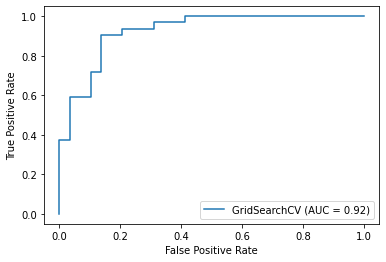

In [45]:
#Import  ROc curve function from the  sklearn.metrics models

#Plot ROc curve and calculate AUC metrix
plot_roc_curve(gs_log_reg,X_test,Y_test);

In [47]:
#Confusion matrix
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


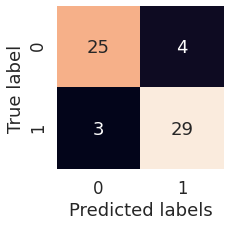

In [55]:
sns.set(font_scale= 1.5)

def plot_conf_mat(Y_test,y_preds):
  """
  plots a nice looking confusion matrix using Seaborn's heatmap()
  """
  fig,ax=plt.subplots(figsize= (3,3))
  ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                 annot= True,
                 cbar = False)
  plt.xlabel("Predicted labels")
  plt.ylabel("True label")

plot_conf_mat(Y_test,y_preds)

We have  build  an ROC ,AUC metric and a confusion matrix  ,lets get a classification report as  well as a cross validated precision,recall and f1-score.

In [56]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

